In [ ]:
import pandas as pd
import numpy as np
import gdown
import joblib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?id=1kybOrHAv7l8IDJ9EYgcmPT3Pz4gQd0mL')
df.head(10)

,Suhu,Kelembaban,Gas,Status
0,3,78,211,suhu aman
1,45,64,213,rawan
2,47,95,195,rawan
3,42,32,194,rawan
4,55,43,209,rawan
5,27,47,202,suhu aman
6,41,72,163,rawan
7,36,12,163,rawan
8,15,95,166,suhu aman
9,38,47,249,rawan


In [ ]:
df.groupby('Status').describe()

Suhu                                                      \
           count       mean       std   min   25%   50%    75%   max   
Status                                                                 
bahaya      85.0  45.905882  8.449603  32.0  38.0  46.0  53.00  59.0   
rawan      384.0  45.781250  8.186728  32.0  38.0  46.0  53.00  59.0   
suhu aman  530.0  15.315094  9.412655   0.0   7.0  15.0  23.75  31.0   

          Kelembaban             ...                 Gas              \
               count       mean  ...    75%   max  count        mean   
Status                           ...                                   
bahaya          85.0  14.917647  ...  22.00  29.0   85.0  215.364706   
rawan          384.0  58.382812  ...  79.00  99.0  384.0  195.033854   
suhu aman      530.0  45.266038  ...  69.75  99.0  530.0  201.307547   

                                                          
                 std    min    25%    50%     75%    max  
Status                                                    
bahaya     20.191256  183.0  198.0  216.0  234.00  248.0  
rawan      27.922148  150.0  171.0  193.5  217.25  249.0  
suhu aman  28.304611  150.0  178.0  203.0  225.75  249.0  

[3 rows x 24 columns]

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming your data is stored in a pandas DataFrame df
# Make sure to install the required libraries using: pip install tensorflow pandas scikit-learn

# Step 1: Prepare the Data
X = df[['Suhu', 'Kelembaban', 'Gas']]
y = df['Status']

# Encode categorical variable 'status'
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

status_name = label_encoder.classes_
print(status_name)



['bahaya' 'rawan' 'suhu aman']


In [ ]:
# Step 2: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Build the Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape=(3,), activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # Adjust output units based on the number of unique classes in 'status'
])

# Step 4: Compile the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the Model
history = model.fit(X_train, y_train, epochs=250, batch_size=8, validation_data=(X_test, y_test))

# Step 6: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Epoch 1/250
100/100 [==============================] - 3s 15ms/step - loss: 0.9600 - accuracy: 0.6220 - val_loss: 0.6948 - val_accuracy: 0.8300
Epoch 2/250
100/100 [==============================] - 1s 7ms/step - loss: 0.4618 - accuracy: 0.8711 - val_loss: 0.3720 - val_accuracy: 0.8750
Epoch 3/250
100/100 [==============================] - 1s 9ms/step - loss: 0.2544 - accuracy: 0.9324 - val_loss: 0.2568 - val_accuracy: 0.9150
Epoch 4/250
100/100 [==============================] - 1s 11ms/step - loss: 0.1742 - accuracy: 0.9574 - val_loss: 0.2014 - val_accuracy: 0.9450
Epoch 5/250
100/100 [==============================] - 1s 5ms/step - loss: 0.1360 - accuracy: 0.9712 - val_loss: 0.1655 - val_accuracy: 0.9500
Epoch 6/250
100/100 [==============================] - 1s 10ms/step - loss: 0.1127 - accuracy: 0.9762 - val_loss: 0.1433 - val_accuracy: 0.9550
Epoch 7/250
100/100 [==============================] - 0s 5ms/step - loss: 0.0981 - accuracy: 0.9737 - val_loss: 0.1307 - val_accuracy: 0.9

In [ ]:
# Evaluate the model on the test set
y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)
print(y_pred[:5])

from sklearn.metrics import accuracy_score,confusion_matrix
# print(accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
print(cm)

# Save label_encoder for later use in predictions
joblib.dump(label_encoder, 'label_encoder.joblib')

# Load label_encoder
loaded_label_encoder = joblib.load('label_encoder.joblib')

7/7 [==============================] - 0s 2ms/step
[2 2 1 1 1]
[[21  1  0]
 [ 0 86  0]
 [ 0  0 92]]


In [ ]:
model.save('smartblaze.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Text(0.5, 1.0, 'confusion matrix for fire dataset prediction')

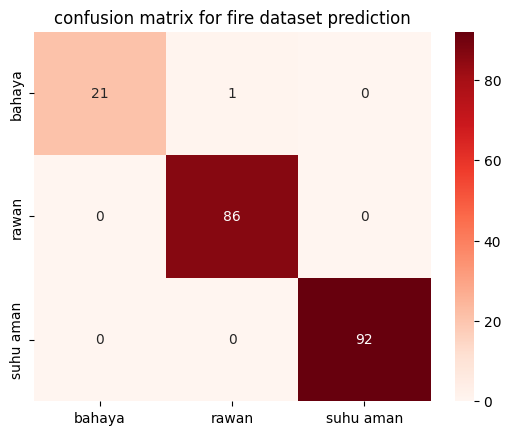

In [ ]:
ax = sns.heatmap(cm,annot=True,fmt='d',cmap ='Reds', xticklabels=status_name,yticklabels=status_name)
ax.set_title('confusion matrix for fire dataset prediction')

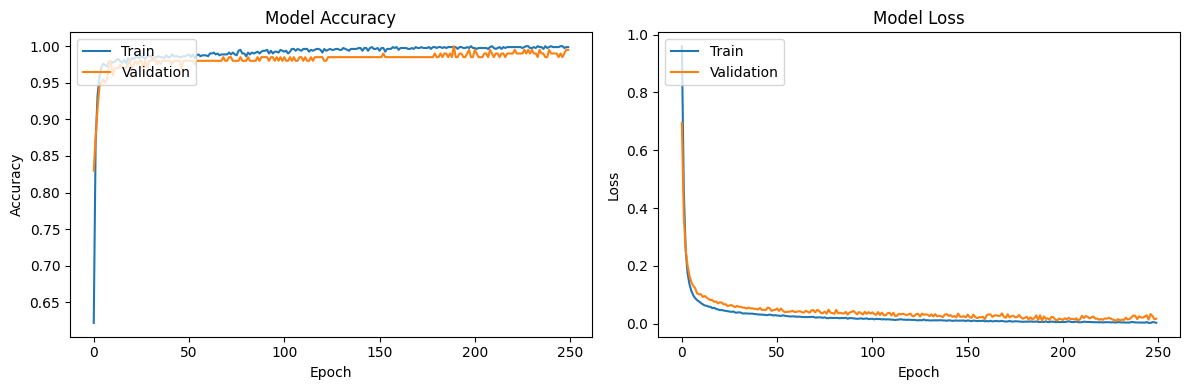

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                128       
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 3)                 51        
                                                                 
Total params: 707 (2.76 KB)
Trainable params: 707 (2.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Create a placeholder DataFrame for demonstration purposes
data_predict = {
    'Suhu': [25, 33, 35],
    'Kelembaban': [60, 50, 20],
    'Gas': [180, 180, 220]
}

df_predict = pd.DataFrame(data_predict)

# Step 1: Prepare the Data for Prediction
X_predict = df_predict[['Suhu', 'Kelembaban', 'Gas']]

# Step 2: Perform Prediction
y_predict_prob = model.predict(X_predict)
y_predict = tf.argmax(y_predict_prob, axis=1).numpy()

# Optional: Decode predicted labels back to original status
y_predict_original = label_encoder.inverse_transform(y_predict)

# Step 3: Display Predictions
print("Predicted Labels:")
print(y_predict)

# Optional: Display Predicted Labels in Original Form
print("\nPredicted Labels (Original):")
print(y_predict_original)

1/1 [==============================] - 0s 103ms/step
Predicted Labels:
[1 1 1]

Predicted Labels (Original):
['rawan' 'rawan' 'rawan']
